In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc


def Q(x):
    return 0.5 * erfc(x / np.sqrt(2))

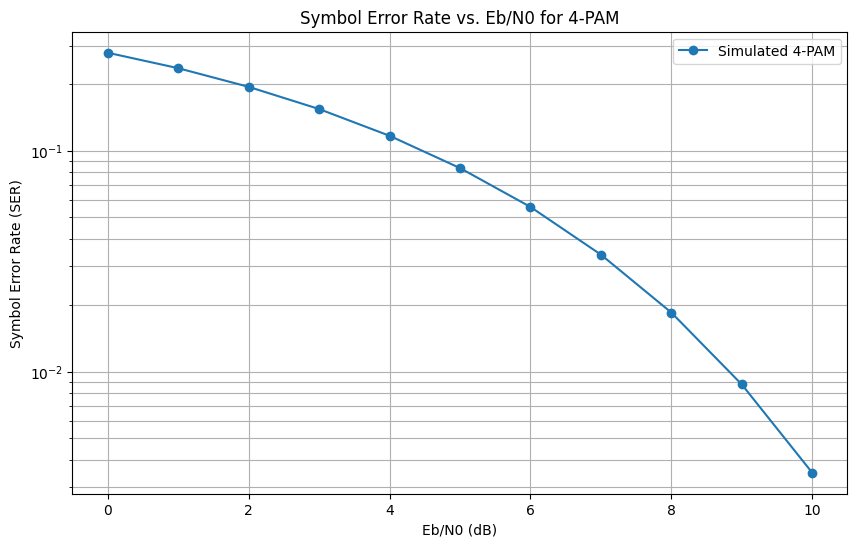

In [2]:
symbols_constellation = np.array([-3, -1, 1, 3])
M = 4
k = np.log2(M)
snr_db_range = np.arange(0, 11, 1)
symbol_sequence_length = int(1e7)

def simulate_ser_4pam(snr_db_range, symbol_sequence_length):
    """Simulate 4-PAM modulation in an AWGN channel and compute SER for each SNR using Monte Carlo simulations."""
    ser = []
    for snr_db in snr_db_range:
        
        snr_linear = 10**(snr_db / 10.0)
        snr_symbol = snr_linear * k
        
        energy_symbol = np.mean(symbols_constellation**2)
        sigma = np.sqrt(energy_symbol/(2*snr_symbol))
        noise = sigma * np.random.randn(symbol_sequence_length)
        
        signal = np.random.choice(symbols_constellation, symbol_sequence_length)
        
        signal_with_noise = signal + noise
        
        signal_demod = [-3 if symbol < -2 else -1 if symbol < 0 else 1 if symbol < 2 else 3 for symbol in signal_with_noise]
        signal_demod = np.array(signal_demod)
        
        num_errors = np.sum(signal != signal_demod)
        
        ser.append(num_errors / symbol_sequence_length)
    
    return ser

simulated_ser = simulate_ser_4pam(snr_db_range, symbol_sequence_length)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, simulated_ser, 'o-', label='Simulated 4-PAM')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Symbol Error Rate vs. Eb/N0 for 4-PAM')
plt.legend()
plt.show()

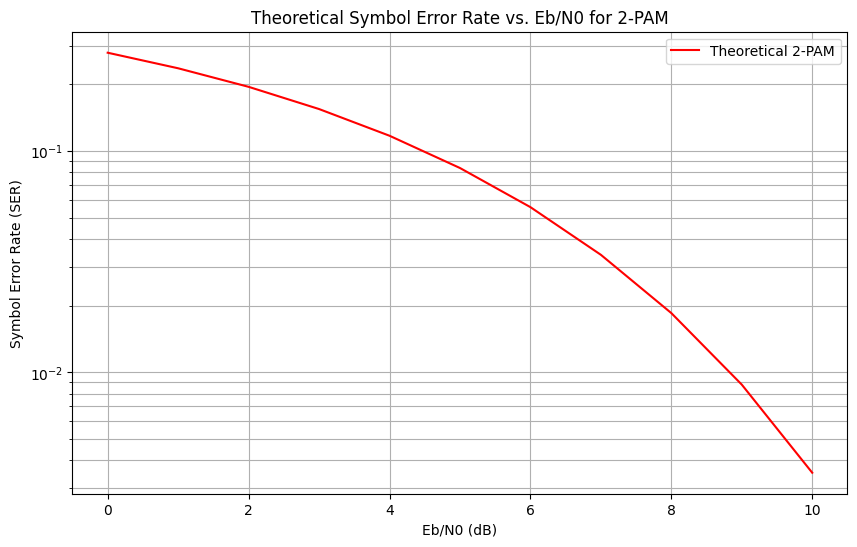

In [3]:
def theoretical_ser(M, snr_db):
    """Calculate the theoretical SER for 2-PAM given an SNR in dB."""
    snr_linear = 10**(snr_db / 10.0)
    Q_arg = np.sqrt(((6*np.log2(M))/(M**2 - 1)) * snr_linear)
    return 2 * (1 - 1/M) * Q(Q_arg)

# Calculate theoretical SER
theoretical_ser = theoretical_ser(M, snr_db_range)

# Plot the theoretical SER
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, theoretical_ser, 'r-', label='Theoretical 2-PAM')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Theoretical Symbol Error Rate vs. Eb/N0 for 2-PAM')
plt.legend()
plt.show()

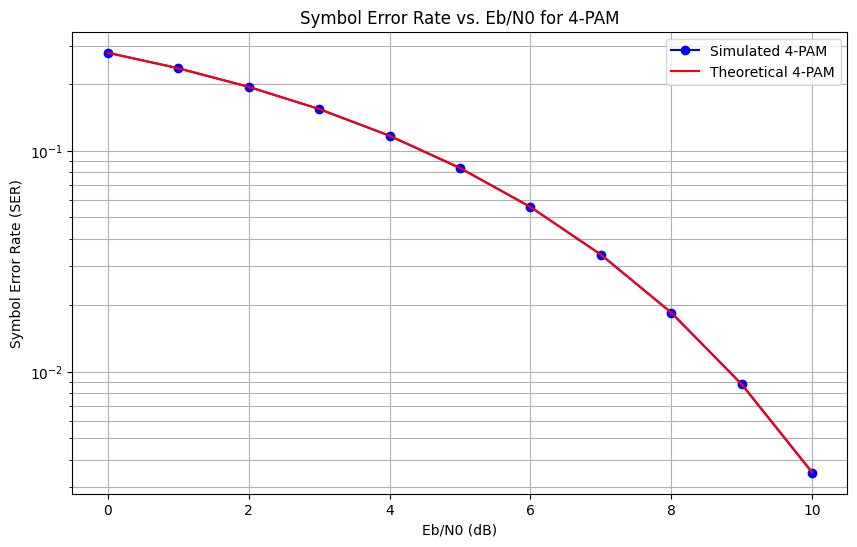

In [4]:
# SIMULATIONA VS THEORETICAL

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, simulated_ser, 'bo-', label='Simulated 4-PAM')
plt.semilogy(snr_db_range, theoretical_ser, 'r-', label='Theoretical 4-PAM')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Symbol Error Rate vs. Eb/N0 for 4-PAM')
plt.legend()
plt.show()